In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

In [2]:
# Create a Quantum Register with 3 qubits.
q = QuantumRegister(4, 'q')

# Create a Quantum Circuit acting on the q register
circ = QuantumCircuit(q)

In [3]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(q[0])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(q[0], q[1])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(q[0], q[2])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 3, putting
# the qubits in a GHZ state.
circ.cx(q[0], q[3])

In [4]:
circ.draw()

In [5]:
# Import Aer
from qiskit import BasicAer

# Run the quantum circuit on a statevector simulator backend
backend = BasicAer.get_backend('statevector_simulator')

In [6]:
# Create a Quantum Program for execution 
job = execute(circ, backend)

In [7]:
result = job.result()

In [8]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.   +0.j 0.707+0.j]


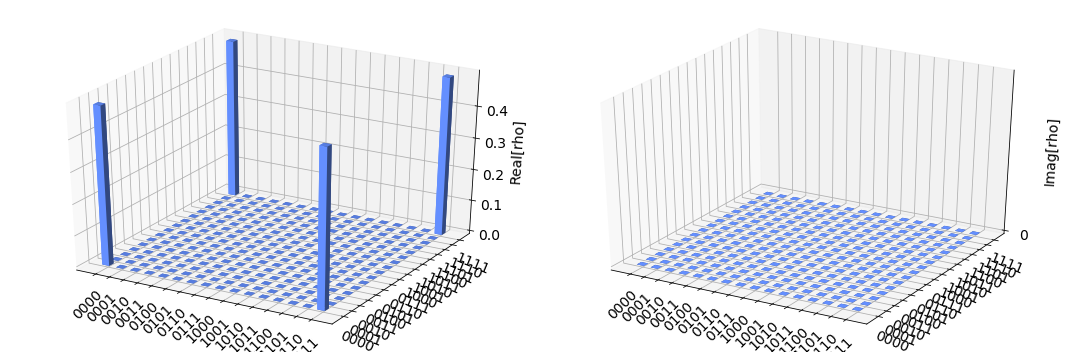

In [9]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [10]:
# Run the quantum circuit on a unitary simulator backend
backend = BasicAer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

# Show the results
print(result.get_unitary(circ, decimals=3))

[[ 0.707+0.j  0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707+0.j
   0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0. 

In [12]:
# Create a Classical Register with 3 bits.
c = ClassicalRegister(4, 'c')
# Create a Quantum Circuit
meas = QuantumCircuit(q, c)
meas.barrier(q)
# map the quantum measurement to the classical bits
meas.measure(q,c)

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ+meas

#drawing the circuit
qc.draw()

In [13]:
# Use Aer's qasm_simulator
backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [14]:
counts = result_sim.get_counts(qc)
print(counts)

{'0000': 527, '1111': 497}


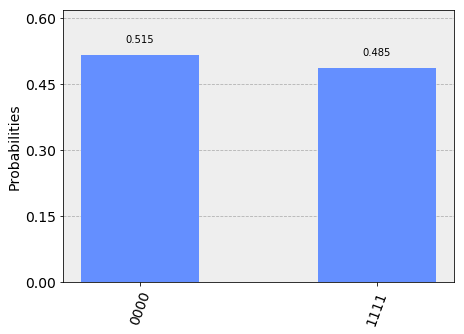

In [15]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [16]:
from qiskit import IBMQ

In [18]:
provider = IBMQ.load_account()

In [19]:
print("Available backends:")
provider.backends()

Available backends:


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx4') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [20]:
from qiskit.providers.ibmq import least_busy

large_enough_devices = provider.backends(filters=lambda x: x.configuration().n_qubits < 10 and
                                                           not x.configuration().simulator)
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())

The best backend is ibmqx4


In [21]:
from qiskit.tools.monitor import job_monitor
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)

Job Status: job has successfully run


In [29]:
result_exp = job_exp.result()

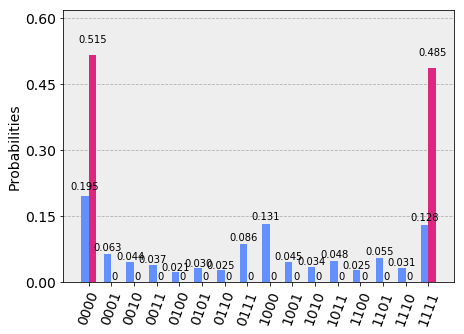

In [30]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [31]:
simulator_backend = provider.get_backend('ibmq_qasm_simulator')

In [32]:
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

job_hpc = execute(qc, backend=simulator_backend, shots=shots, max_credits=max_credits)

In [33]:
result_hpc = job_hpc.result()

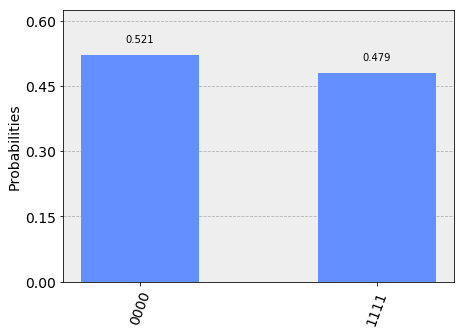

In [34]:
counts_hpc = result_hpc.get_counts(qc)
plot_histogram(counts_hpc)

In [35]:
job_id = job_exp.job_id()

print('JOB ID: {}'.format(job_id))

JOB ID: 5d4ee51525f1aa0011f252ac


In [36]:
retrieved_job = backend.retrieve_job(job_id)

In [37]:
retrieved_job.result().get_counts(qc)

{'0011': 38,
 '1100': 26,
 '1010': 35,
 '1011': 49,
 '1110': 32,
 '1111': 131,
 '0110': 26,
 '0111': 88,
 '1101': 56,
 '1001': 46,
 '0100': 22,
 '0101': 31,
 '0000': 200,
 '0001': 65,
 '0010': 45,
 '1000': 134}